### Overview

This JupyTer notebook demonstrates the extraction of metadata from all files of a given directory into a `.csv` file. It then performs analytics on the types of files contained in the directory

In [1]:
import sys
sys.path.append('file_processing')

from file_processing.directory import Directory

#### Defining the directory to analyze

Point to the directory of interest. For absolute paths, format using one of these formats: `r'C:\...\...'` or `'C:\\...\\'` or `'C:/.../...'`

In [2]:
dir = Directory('.')

#### Exploring the CSV report

`dir.generate_report()` accepts the following:

* `report_file` (str): Path to the output csv file
* `include_text` (bool; False): Whether to include text data from the files in the report
* `filters` (dict; None): Inclusion/exclusion criteria
* `keywords` (list; None): A list of keywords to count in the 'text' field of the metadata
* `migrate_filters` (dict; None): Adds a boolean column with 1 if the file satisfies the input criteria, else 0
* `open_files` (bool; True): Whether to open the files to extract file-specific metadata
* `split_metadata` (bool; False): Whether to split the file-specific metadata object such that each field has its own column

Sample filter parameter:

```py
filter = {
    'exclude_str': ['.venv', '.pytest_cache', '.vscode', '__pycache__']         # directories or specific files to EXCLUDE
    'include_str': ['file_processing', 'tests', '__init.py__'],                 # directories or specific files to INCLUDE
    'extensions': ['.csv', '.docx', '.pptx', '.xlsx', '.pdf'],                  # file extensions to INCLUDE
    'exclude_extensions': ['.tmp', '', '.py'],                                  # file extensions to EXCLUDE
    'min_size': 10000,                                                          # minimum file size (in bytes)
    'max_size': 50000                                                           # maximum file size (in bytes)
}
```

In [3]:
dir.generate_report('./tests/resources/sample_reports/report.csv', split_metadata=True, filters={'exclude_str': ['.venv', '.pytest_cache', '.vscode', '__pycache__', '.git']})

Generating Report: 100%|██████████| 41652/41652 [00:48<00:00, 861.51file/s]  


#### Filtering out the data of interest

In [4]:
import pandas as pd

analytics = dir.generate_analytics(report_file='./tests/resources/sample_reports/analytics.csv', filters={'exclude_str': ['.venv', '.pytest_cache', '.vscode', '__pycache__', '.git']})
df = pd.DataFrame.from_dict((analytics), orient='index')
df.rename(columns={'Size (MB)': 'size', 'Count': 'count'}, inplace=True)
df

Generating Report: 100%|██████████| 41653/41653 [00:05<00:00, 7660.62file/s] 


,size,count
,0.046164,2
.ipynb,0.118149,2
.toml,0.000161,1
.md,0.005835,2
.txt,0.223957,12
.py,0.454188,62
.csv,17.622423,6
.pdf,1.627953,11
.html,0.503157,3
.docx,0.097953,6


#### Visualizing the filtered data

Text(0.5, 1.0, 'File types by Count and Size (mb)')

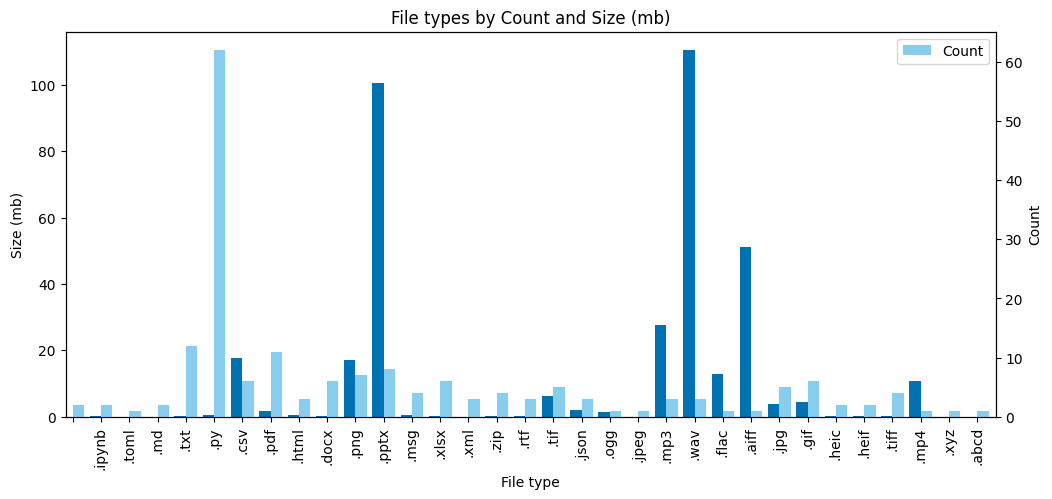

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax2.yaxis.get_major_locator().set_params(integer=True)

width = 0.4

(df['size']).plot(kind='bar', color='#0072b2', ax=ax, width=width, position=1, label='Size (mb)')
df['count'].plot(kind='bar', color='#88ccee', ax=ax2, width=width, position=0, label='Count')

ax.set_ylabel('Size (mb)')
ax2.set_ylabel('Count')
ax.set_xlabel('File type')

plt.legend()
plt.title('File types by Count and Size (mb)')


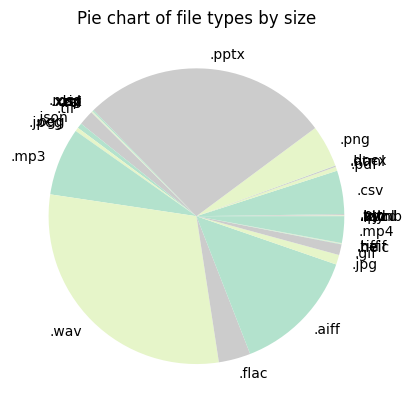

In [6]:
import numpy as np

labels = df.index
sizes = df['size']

cmap = plt.get_cmap("Pastel2")

plt.title('Pie chart of file types by size')
plt.pie(sizes, labels=labels, colors=cmap(np.arange(3)*4))
plt.show()